# Abdallah I. J. Dwikat - Computer Engineering Department

In [60]:
#Import libraries here
import inspect
import time
from pprint import PrettyPrinter

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg

In [61]:
path = r"C:\Users\hp\Research-Try-ML\Models\SST-Antalya-2007-2023-Cleaned.csv"
df = pd.read_csv(path)
df.head()

,Date,SST
0,1-Jan-07,17.9
1,2-Jan-07,17.9
2,3-Jan-07,17.7
3,4-Jan-07,17.5
4,5-Jan-07,17.4


In [62]:
df.set_index('Date', inplace=True)
df.head()

,SST
Date,
1-Jan-07,17.9
2-Jan-07,17.9
3-Jan-07,17.7
4-Jan-07,17.5
5-Jan-07,17.4


In [63]:
y = df['SST']
print(y.head())

Date
1-Jan-07    17.9
2-Jan-07    17.9
3-Jan-07    17.7
4-Jan-07    17.5
5-Jan-07    17.4
Name: SST, dtype: float64


In [64]:
# Convert the index to DatetimeIndex
y.index = pd.to_datetime(y.index, format='%d-%b-%y')

# Display the first few rows to confirm the change
print(y.head())

Date
2007-01-01    17.9
2007-01-02    17.9
2007-01-03    17.7
2007-01-04    17.5
2007-01-05    17.4
Name: SST, dtype: float64


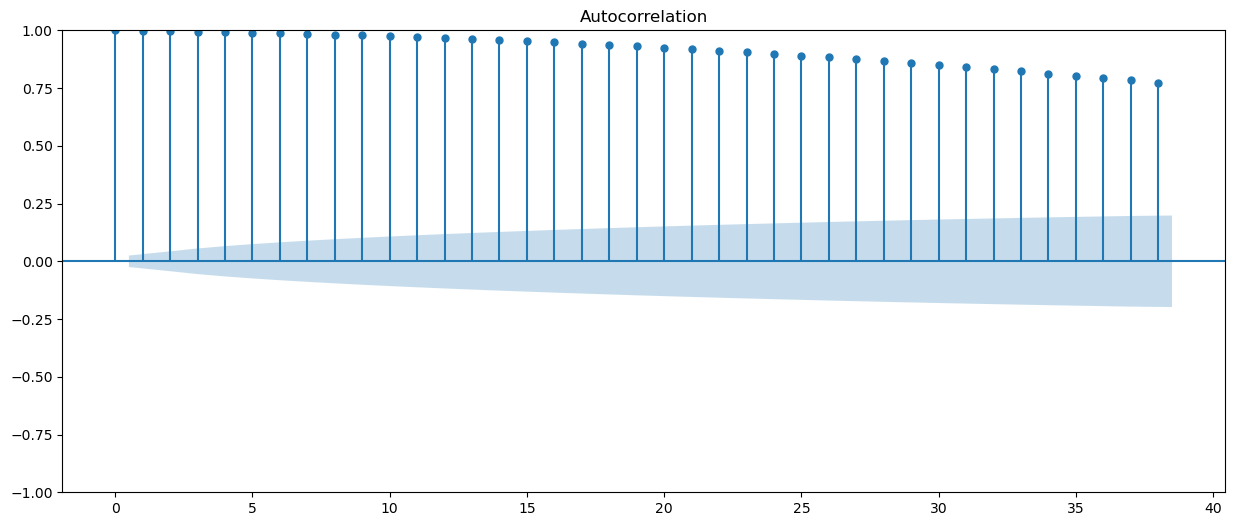

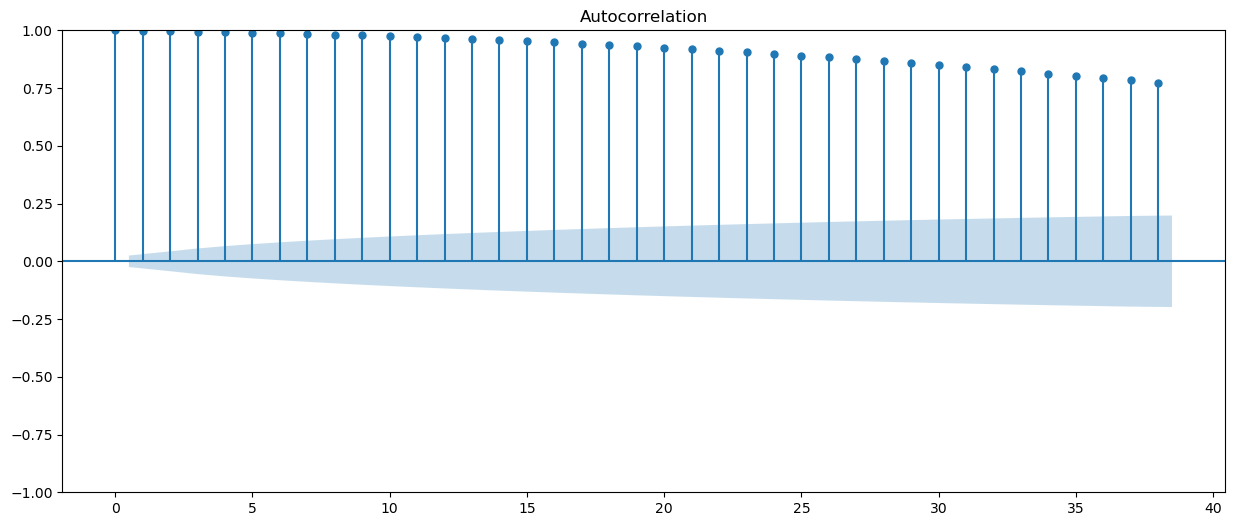

In [65]:
fig, ax = plt.subplots(figsize = (15, 6))
plot_acf(y, ax=ax)

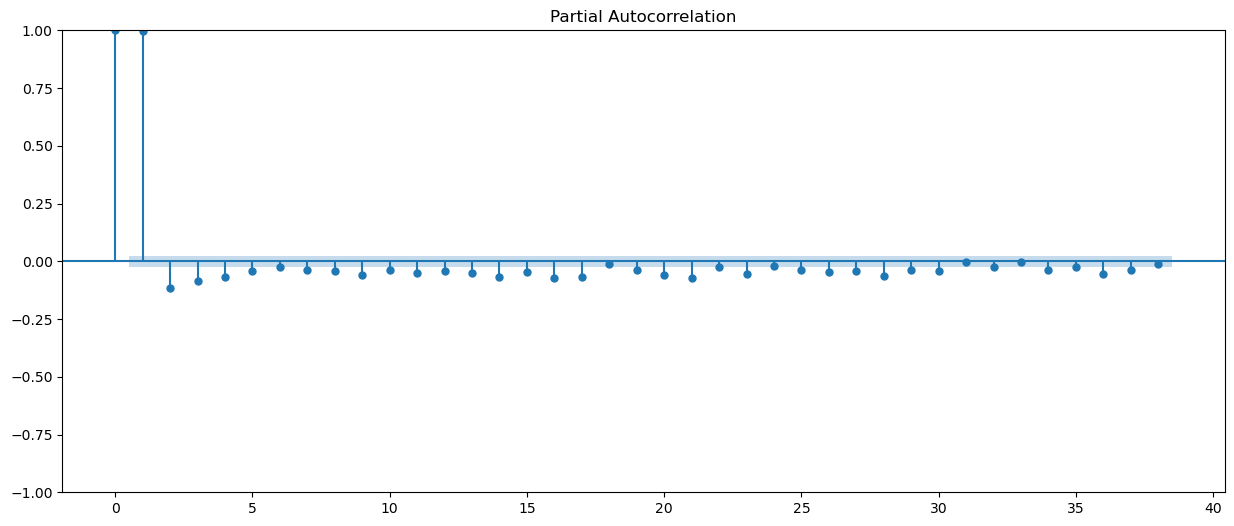

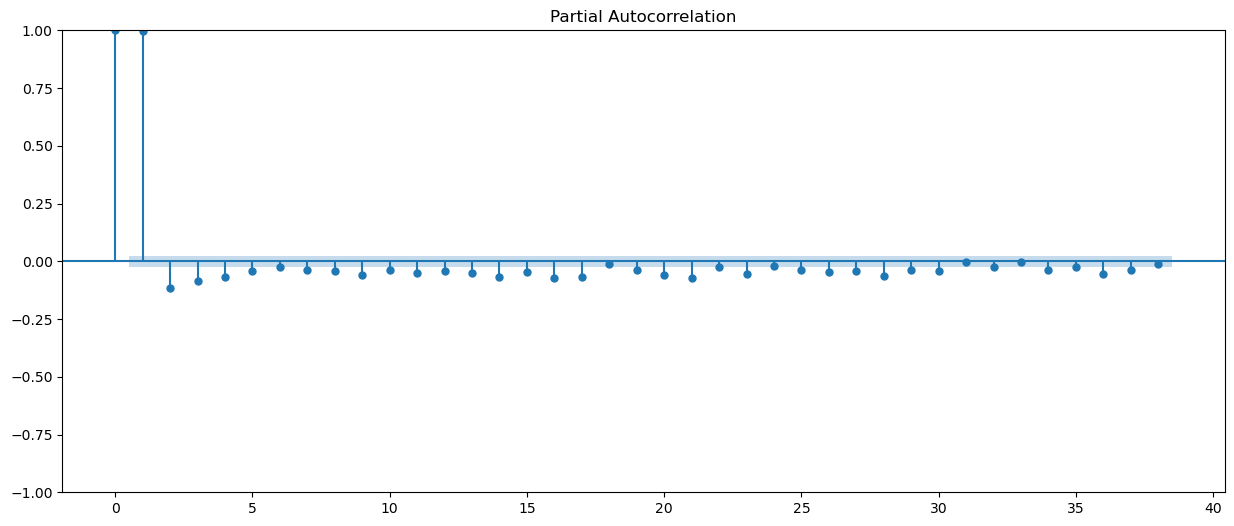

In [66]:
fig, ax = plt.subplots(figsize = (15, 6))
plot_pacf(y, ax=ax)

# Train/Test Split

In [67]:
y_train = y.loc["2007-01-01":"2020-12-31"]
y_test = y.loc["2021-01-01":]
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (5114,)
y_test shape: (1095,)


## use an AutoReg model to predict SST readings, but which hyperparameter settings will give you the best performance? Use a for loop to train your AR model on using settings for lags from 1 to 30. Each time you train a new model, calculate its mean absolute error and append the result to the list maes. Then store your results in the Series mae_series.

In [68]:
# Create range to test different lags
p_params = range(1, 37)

# Create empty list to hold mean absolute error scores
maes = []

# Iterate through all values of p in `p_params`
for p in p_params:
    # Build model with current lag value
    model = AutoReg(y_train, lags=p).fit()

    # Make predictions on training data
    y_pred = model.predict(start=p, end=len(y_train)-1)

    # Calculate mean absolute error for training data vs predictions
    mae = mean_absolute_error(y_train[p:], y_pred)

    # Append `mae` to list `maes`
    maes.append(mae)

# Put list `maes` into Series with index `p_params`
mae_series = pd.Series(maes, name="mae", index=p_params)

# Inspect head of Series
print(mae_series)

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so infe

1     0.162169
2     0.160869
3     0.160417
4     0.159926
5     0.159528
6     0.159311
7     0.159064
8     0.158534
9     0.158131
10    0.157886
11    0.157733
12    0.157633
13    0.157084
14    0.156802
15    0.156465
16    0.155944
17    0.155519
18    0.155475
19    0.155277
20    0.154820
21    0.154271
22    0.153855
23    0.153556
24    0.153546
25    0.153337
26    0.153046
27    0.152852
28    0.152490
29    0.152285
30    0.152048
31    0.152057
32    0.151918
33    0.151803
34    0.151707
35    0.151638
36    0.151373
Name: mae, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so infe

## Look through the results in mae_series and determine what value for p provides the best performance. Then build and train best_model using the best hyperparameter value.

## Note: Make sure that you build and train your model in one line of code, and that the data type of best_model is statsmodels.tsa.ar_model.AutoRegResultsWrapper.

In [69]:
# Find the best value for p
best_p = mae_series.idxmin()

# Build and train the best model in one line of code
best_model = AutoReg(y_train, lags=best_p).fit()

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



## Calculate the training residuals for best_model and assign the result to y_train_resid. Note that your name of your Series should be "residuals".

In [70]:
y_train_resid = y_train[best_p:] - best_model.fittedvalues

# Assign the name "residuals" to the Series
y_train_resid.name = "residuals"

# Inspect the head of the Series
print(y_train_resid.head())

Date
2007-02-06   -0.384594
2007-02-07    0.064673
2007-02-08    0.083485
2007-02-09   -0.205197
2007-02-10    0.085014
Name: residuals, dtype: float64


## Create a histogram of y_train_resid. Be sure to label the x-axis as "Residuals" and the y-axis as "Frequency". Use the title "Best Model, Training Residuals".

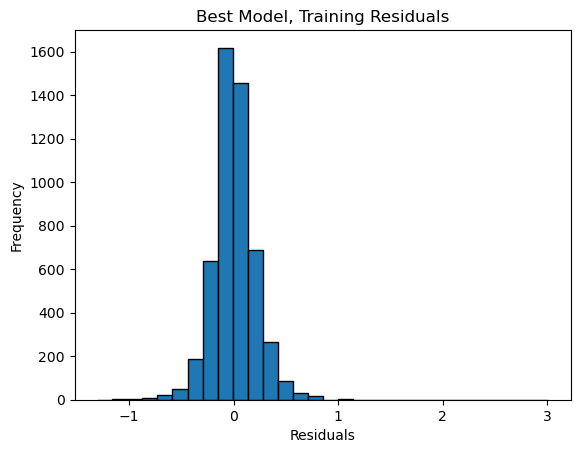

In [71]:
# Plot histogram of residuals
import matplotlib.pyplot as plt

# Plot histogram of residuals
plt.hist(y_train_resid, bins=30, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Best Model, Training Residuals")
plt.show()

## Create an ACF plot for y_train_resid. Be sure to label the x-axis as "Lag [days]" and y-axis as "Correlation Coefficient". Use the title "SST, Training Residuals ACF".

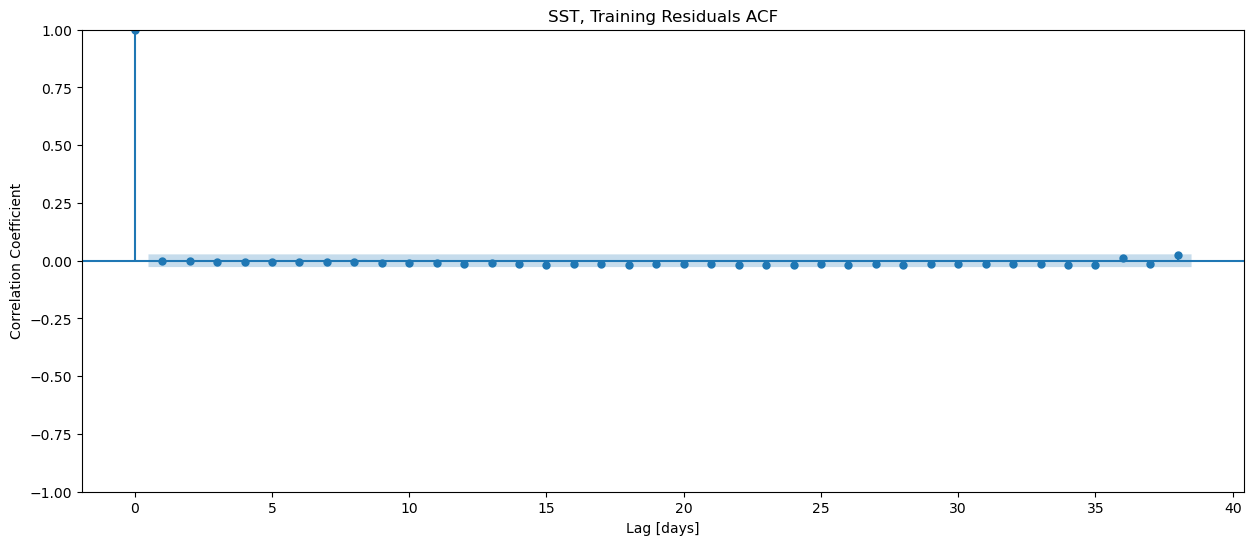

In [72]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y_train_resid, ax=ax)

# Label the axes and title
ax.set_xlabel("Lag [days]")
ax.set_ylabel("Correlation Coefficient")
ax.set_title("SST, Training Residuals ACF")

# Show the plot
plt.show()

## Perform walk-forward validation for your model for the entire test set y_test. Store your model's predictions in the Series y_pred_wfv. Make sure the name of your Series is "prediction" and the name of your Series index is "timestamp".

In [73]:
import pandas as pd

# Initialize the history with the training data
history = list(y_train)

# Create an empty list to store predictions
predictions = []

# Perform walk-forward validation
for i in range(len(y_test)):
    # Build and fit the model on the current history
    model = AutoReg(history, lags=best_p).fit() #best_p
    
    # Make a prediction for the next time step
    yhat = model.predict(start=len(history), end=len(history))[0]
    
    # Append the prediction to the list
    predictions.append(yhat)
    
    # Append the actual observation to the history
    history.append(y_test[i])

# Convert predictions to a Series
y_pred_wfv = pd.Series(predictions, index=y_test.index, name="prediction")
y_pred_wfv.index.name = "timestamp"

# Inspect the head of the Series
print(y_pred_wfv.head())

C:\Users\hp\AppData\Local\Temp\ipykernel_15868\2947138482.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\hp\AppData\Local\Temp\ipykernel_15868\2947138482.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\hp\AppData\Local\Temp\ipykernel_15868\2947138482.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\hp\AppData\Local\Temp\ipykernel_15868\2947138482.py:21: FutureWarning:

Series.__getitem__ tre

timestamp
2021-01-01    19.727892
2021-01-02    19.410108
2021-01-03    19.978888
2021-01-04    19.820234
2021-01-05    19.523350
Name: prediction, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_15868\2947138482.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\hp\AppData\Local\Temp\ipykernel_15868\2947138482.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\hp\AppData\Local\Temp\ipykernel_15868\2947138482.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\hp\AppData\Local\Temp\ipykernel_15868\2947138482.py:21: FutureWarning:

Series.__getitem__ tre

## Put the values for y_test and y_pred_wfv into the DataFrame df_pred_test (don't forget the index). Then plot df_pred_test using plotly express. In the legend, your lines should be labeled "y_test" and "y_pred_wfv". Be sure to label the x-axis as "Date" and the y-axis as "SST". Use the title "SST, WFV Predictions".

In [74]:
print("Best p value:", best_p)


Best p value: 36


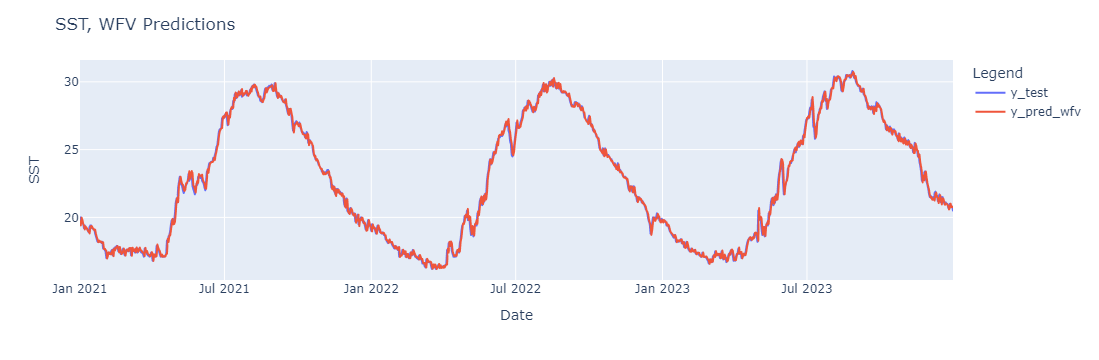

In [76]:
import pandas as pd
import plotly.express as px

# Create DataFrame with y_test and y_pred_wfv
df_pred_test = pd.DataFrame({'y_test': y_test, 'y_pred_wfv': y_pred_wfv})

# Plot the DataFrame using Plotly Express
fig = px.line(df_pred_test, labels={'value': 'SST', 'index': 'Date'})
fig.update_layout(
    title="SST, WFV Predictions",
    xaxis_title="Date",
    yaxis_title="SST",
    legend_title_text='Legend'
)
fig.for_each_trace(lambda t: t.update(name = {'y_test': 'y_test', 'y_pred_wfv': 'y_pred_wfv'}[t.name]))
fig.show()

In [77]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_wfv) * 100

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_wfv)

# Calculate R^2
r2 = r2_score(y_test, y_pred_wfv) * 100

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}%")


MAPE: 0.98%
MSE: 0.09
R^2: 99.57%


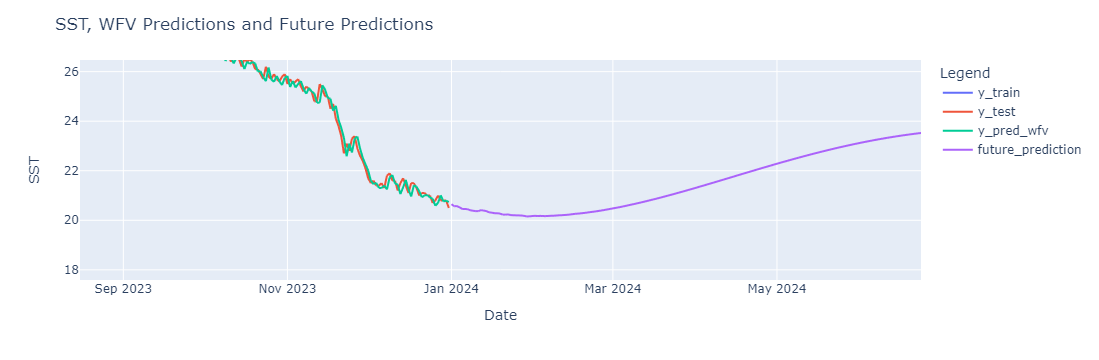

In [59]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.ar_model import AutoReg

# Predict future values until 31-Dec-2030
future_dates = pd.date_range(start="2024-01-01", end="2030-12-31", freq='D')
future_predictions = []

history = list(y_train) + list(y_test) + list(y_pred_wfv)

for date in future_dates:
    model = AutoReg(history, lags=best_p).fit()
    yhat = model.predict(start=len(history), end=len(history))[0]
    future_predictions.append(yhat)
    history.append(yhat)

# Convert future predictions to a Series
y_pred_future = pd.Series(future_predictions, index=future_dates, name="future_prediction")

# Combine actual, walk-forward, and future predictions into one DataFrame
df_all = pd.concat([y_train.rename("y_train"), y_test.rename("y_test"), y_pred_wfv.rename("y_pred_wfv"), y_pred_future], axis=1).reset_index()

# Melt the DataFrame for Plotly Express
df_melted = df_all.melt(id_vars='index', value_vars=['y_train', 'y_test', 'y_pred_wfv', 'future_prediction'], var_name='Type', value_name='SST')

# Plot the DataFrame using Plotly Express
fig = px.line(df_melted, x='index', y='SST', color='Type', labels={'SST': 'SST', 'index': 'Date'})
fig.update_layout(
    title="SST, WFV Predictions and Future Predictions",
    xaxis_title="Date",
    yaxis_title="SST",
    legend_title_text='Legend'
)
fig.show()

## To determine the most reliable prediction period for the model
### Evaluate Model Performance on Historical Data:
### Split your data into training and validation sets.
### Use the validation set to simulate future predictions.
### Measure the prediction accuracy over different time horizons (e.g., 1 day, 2 days, 1 week, etc.).
### Calculate Error Metrics:
### Use metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) to quantify prediction accuracy.
### Plot these error metrics against the prediction horizon to visualize how accuracy changes over time.
### Identify the Reliable Period:
### Look for the point where the error metrics start to increase significantly.
### This point indicates the maximum horizon where the model’s predictions remain reliable.

# This code will help visualize how the prediction error changes over different horizons

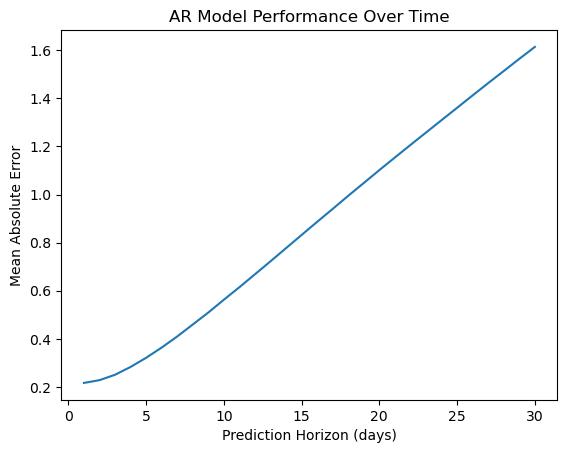

In [78]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error

# Define the function to evaluate model performance
def evaluate_model(history, test, max_horizon, lags):
    errors = []
    for horizon in range(1, max_horizon + 1):
        predictions = []
        for i in range(len(test) - horizon + 1):
            model = AutoReg(history, lags=lags).fit()
            yhat = model.predict(start=len(history), end=len(history) + horizon - 1)
            predictions.append(yhat[-1])
            history.append(test[i])
        error = mean_absolute_error(test[:len(predictions)], predictions)
        errors.append(error)
        history = history[:-len(predictions)]  # Reset history
    return errors

# Evaluate the model
max_horizon = 30  # Evaluate up to 30 days
errors = evaluate_model(list(y_train), list(y_test), max_horizon, best_p)

# Plot the errors
import matplotlib.pyplot as plt

plt.plot(range(1, max_horizon + 1), errors)
plt.xlabel('Prediction Horizon (days)')
plt.ylabel('Mean Absolute Error')
plt.title('AR Model Performance Over Time')
plt.show()
